In [292]:
!pip install pdf2image


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [293]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf

In [294]:
#Loading data
df = pd.read_excel('ie_data.xlsx', sheet_name='Data', skiprows=7)

In [295]:
df

,Date,P,D,E,CPI,Fraction,Rate GS10,Real Price,Dividend,Price,...,10Y Excess Return,1Y Annualized Stock Real Return,1Y Annualized Bonds Real Return,1Y Excess Return,1M Stock Return,1M Bond Return,1M Excess Return,3M Stock Return,3M Bond Return,3M Excess Return
0,"1,871.01",4.44,0.26,0.40,12.46,"1,871.04",5.32,114.11,6.68,114.11,...,0.04,0.14,0.04,0.10,-0.13,-0.27,0.13,0.33,0.02,0.31
1,"1,871.02",4.50,0.26,0.40,12.84,"1,871.12",5.32,112.23,6.48,112.77,...,0.04,0.16,0.07,0.10,0.18,-0.12,0.30,0.72,0.26,0.46
2,"1,871.03",4.61,0.26,0.40,13.03,"1,871.21",5.33,113.29,6.39,114.37,...,0.03,0.17,0.06,0.11,1.30,0.64,0.66,0.71,0.42,0.28
3,"1,871.04",4.74,0.26,0.40,12.56,"1,871.29",5.33,120.90,6.63,122.61,...,0.03,0.10,0.00,0.10,0.88,0.39,0.49,0.22,0.23,-0.01
4,"1,871.05",4.86,0.26,0.40,12.27,"1,871.37",5.33,126.84,6.79,129.21,...,0.03,0.05,-0.02,0.07,0.15,0.27,-0.12,0.13,0.19,-0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,"2,025.02","6,038.69",75.71,NaN,319.08,"2,025.12",4.45,"6,062.44",76.01,"4,069,190.08",...,NaN,NaN,NaN,NaN,-0.52,0.20,-0.72,-0.22,0.10,-0.32
1850,"2,025.03","5,683.98",76.15,NaN,319.80,"2,025.21",4.28,"5,693.54",76.27,"3,825,848.83",...,NaN,NaN,NaN,NaN,-0.50,0.03,-0.53,NaN,NaN,NaN
1851,"2,025.04","5,369.50",NaN,NaN,320.16,"2,025.29",4.28,"5,372.50",NaN,"3,610,122.44",...,NaN,NaN,NaN,NaN,0.98,0.07,0.91,NaN,NaN,NaN
1852,"2,025.05","5,686.67",NaN,NaN,320.34,"2,025.37",4.25,"5,686.67",NaN,"3,821,231.71",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
# Clean up of data
df = df[['Date', 'CAPE', 'Real Price', 'Real Earnings', '10Y Excess Return', '1Y Excess  Return', '1M Excess Return', '3M Excess Return', '1Y Annualized Bonds Real Return']]
df = df.dropna()
df.columns = ['Date_org', 'CAPE', 'Price', 'Earnings', '10Y Excess Return', '1Y Excess Return', '1M Excess Return', '3M Excess Return', '1Y Bond Return']
df['Year'] = df['Date_org'].astype(int)  # Extract the integer part as the year
df['Month'] = ((df['Date_org'] - df['Year']) * 100).round(0).astype(int)  # Extract the fractional part and convert to month
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')
df.set_index('Date', inplace=True)
df = df[df.index >= '1900-01-01']

In [297]:
df

,Date_org,CAPE,Price,Earnings,10Y Excess Return,1Y Excess Return,1M Excess Return,3M Excess Return,1Y Bond Return,Year,Month
Date,,,,,,,,,,,
1900-01-01,"1,900.01",18.67,247.44,19.47,0.07,0.18,0.22,0.17,0.06,1900,1
1900-02-01,"1,900.02",18.70,248.90,19.24,0.06,0.19,0.11,-0.12,0.09,1900,2
1900-03-01,"1,900.03",18.78,250.91,19.24,0.06,0.23,0.17,-0.27,0.09,1900,3
1900-04-01,"1,900.04",18.94,254.11,19.24,0.06,0.33,-0.61,-0.30,0.10,1900,4
1900-05-01,"1,900.05",18.40,247.99,19.71,0.06,0.32,-0.36,-0.06,0.07,1900,5
...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,"2,015.01",26.49,"2,779.98",138.84,0.13,-0.04,0.46,0.15,-0.01,2015,1
2015-02-01,"2,015.02",27.00,"2,841.68",136.84,0.12,-0.10,0.05,0.13,0.03,2015,2
2015-03-01,"2,015.03",26.73,"2,821.87",134.65,0.12,-0.04,-0.02,0.14,0.03,2015,3


In [298]:
# Calculate E/P
df = df[df['CAPE'] != 0]  # Filter out rows where CAPE is zero
df['EP'] = 1 / df['CAPE']

# Calculate future returns
df['Return_10Y'] = df['Price'].shift(-120) / df['Price'] - 1
df['Return_1Y'] = df['Price'].shift(-12) / df['Price'] - 1
df['Return_1M'] = df['Price'].shift(-1) / df['Price'] - 1

df_reg = df.dropna(subset=['Return_10Y', 'Return_1Y', 'Return_1M', 'EP', '10Y Excess Return', '1Y Excess Return', '1M Excess Return', '3M Excess Return'])

# Run OLS regression with Newey-West standard errors
def run_regression(y, x):
    try:
        x = sm.add_constant(x)
        model = sm.OLS(y, x).fit(cov_type='HAC', cov_kwds={'maxlags': 1})
        return {
            'Beta': model.params[1],
            'T-statistic': model.tvalues[1],
            'R-squared': model.rsquared
        }
    except Exception as e:
        return {'Beta': None, 'T-stat': None, 'R-squared': None}

# Table 1
results = {
    'Next 10Y': run_regression(df_reg['10Y Excess Return'], df_reg['EP']),
    'Next 1Y': run_regression(df_reg['1Y Excess Return'], df_reg['EP']),
    'Next 1M': run_regression(df_reg['1M Excess Return'], df_reg['EP']),
}
results_df = pd.DataFrame(results).T.round(2)
print("Table 1 - Regression Summary")
print(results_df)


Table 1 - Regression Summary
          Beta  T-statistic  R-squared
Next 10Y  0.72        12.58       0.20
Next 1Y   1.30         4.13       0.04
Next 1M  12.24         1.09       0.01


/var/folders/pk/1f2_609s7cl4sjxfyj9b_s6m0000gn/T/ipykernel_73567/321966608.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Beta': model.params[1],
/var/folders/pk/1f2_609s7cl4sjxfyj9b_s6m0000gn/T/ipykernel_73567/321966608.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'T-statistic': model.tvalues[1],
/var/folders/pk/1f2_609s7cl4sjxfyj9b_s6m0000gn/T/ipykernel_73567/321966608.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[po

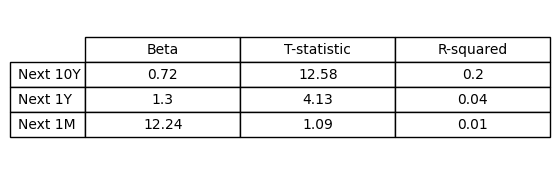

In [299]:
#Table 1 export


# Your existing results_df
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust size as needed
ax.axis('off')
table = ax.table(cellText=results_df.values,
                 colLabels=results_df.columns,
                 rowLabels=results_df.index,
                 loc='center',
                 cellLoc='center')

# Styling (optional)
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

# Save as PNG or JPG
plt.savefig("table_1.jpg", dpi=300, bbox_inches='tight')
plt.show()

Bin Borders: [ 4.78424105 10.32934892 12.93588238 16.65924919 20.81645722 44.19793976]


/var/folders/pk/1f2_609s7cl4sjxfyj9b_s6m0000gn/T/ipykernel_73567/1813486179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['CAPE_bin'], bin_borders = pd.qcut(df_reg['CAPE'], 5, labels=['5 (Cheapest)', '4', '3', '2', '1 (Richest)'], retbins=True)
/var/folders/pk/1f2_609s7cl4sjxfyj9b_s6m0000gn/T/ipykernel_73567/1813486179.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_reg.groupby('CAPE_bin')[['10Y Excess Return']].mean() * 100  # Percent


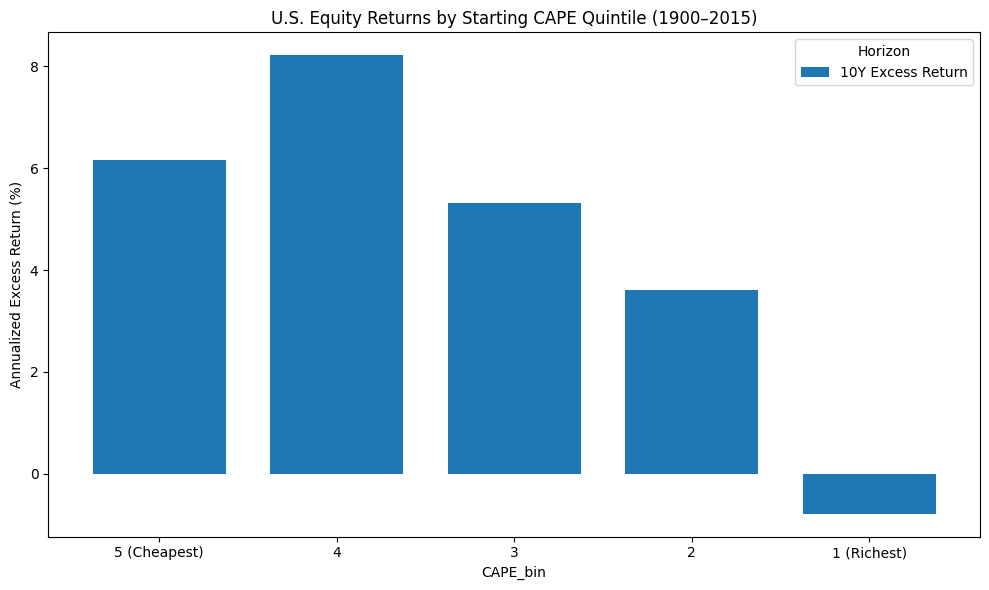

In [300]:
# Bin data into quintiles based on CAPE (low CAPE = cheap)
df_reg['CAPE_bin'], bin_borders = pd.qcut(df_reg['CAPE'], 5, labels=['5 (Cheapest)', '4', '3', '2', '1 (Richest)'], retbins=True)
print("Bin Borders:", bin_borders)

# Compute average excess returns by CAPE bin
grouped = df_reg.groupby('CAPE_bin')[['10Y Excess Return']].mean() * 100  # Percent

# Plot charts
grouped.plot(kind='bar', figsize=(10, 6), width=0.75)
plt.title("U.S. Equity Returns by Starting CAPE Quintile (1900–2015)")
plt.ylabel("Annualized Excess Return (%)")
plt.xticks(rotation=0)
plt.legend(title="Horizon")
plt.tight_layout()
plt.show()

In [301]:
bin_borders

array([ 4.78424105, 10.32934892, 12.93588238, 16.65924919, 20.81645722,
       44.19793976])

In [302]:
# Show CAPE and assigned bin for a sanity check
print(df_reg[['CAPE', 'CAPE_bin']].sort_values('CAPE', ascending=True).head(100))

            CAPE      CAPE_bin
Date                          
1920-12-01  4.78  5 (Cheapest)
1920-08-01  5.02  5 (Cheapest)
1920-06-01  5.04  5 (Cheapest)
1920-07-01  5.08  5 (Cheapest)
1921-01-01  5.12  5 (Cheapest)
...          ...           ...
1924-01-01  8.07  5 (Cheapest)
1980-03-01  8.08  5 (Cheapest)
1980-05-01  8.10  5 (Cheapest)
1923-01-01  8.15  5 (Cheapest)
1924-02-01  8.16  5 (Cheapest)

[100 rows x 2 columns]


Bin Borders: [-44.19793976 -20.81645722 -16.65924919 -12.93588238 -10.32934892
  -4.78424105]


/var/folders/pk/1f2_609s7cl4sjxfyj9b_s6m0000gn/T/ipykernel_73567/2763402409.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['CAPE_bin'], bin_borders = pd.qcut(-df_reg['CAPE'], 5,
/var/folders/pk/1f2_609s7cl4sjxfyj9b_s6m0000gn/T/ipykernel_73567/2763402409.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_reg.groupby('CAPE_bin')[['10Y Excess Return']].mean() * 100  # Percent


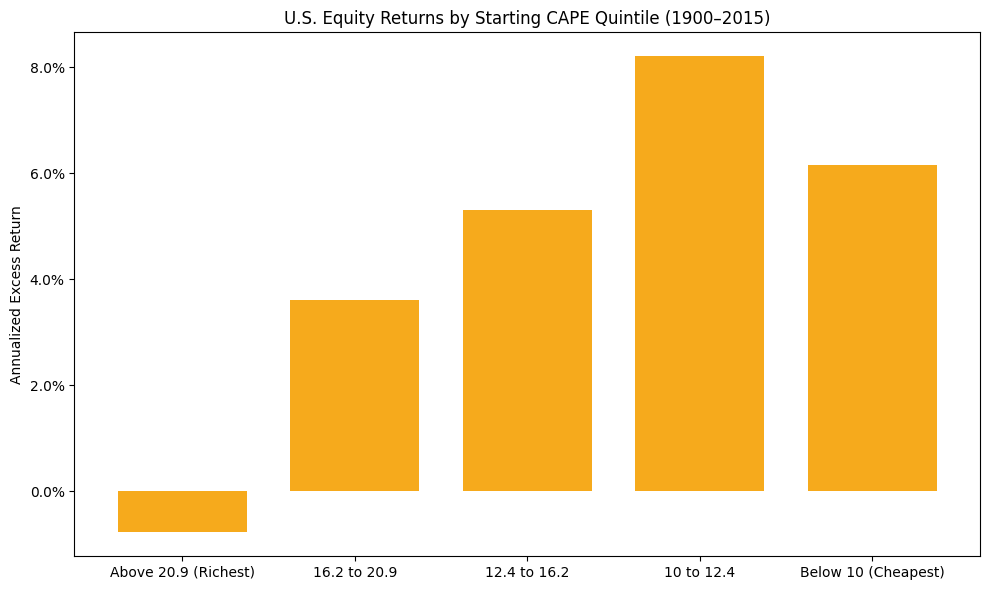

In [303]:
#Chart 1 to report (change of order)
import matplotlib.ticker as mtick

# Bin data into quintiles based on CAPE (low CAPE = cheap)
df_reg['CAPE_bin'], bin_borders = pd.qcut(-df_reg['CAPE'], 5, 
    labels=['Above 20.9 (Richest)', '16.2 to 20.9', '12.4 to 16.2', '10 to 12.4', 'Below 10 (Cheapest)'],
    retbins=True)
print("Bin Borders:", bin_borders)

# Compute average excess returns by CAPE bin
grouped = df_reg.groupby('CAPE_bin')[['10Y Excess Return']].mean() * 100  # Percent

# Plot charts
ax = grouped.plot(kind='bar', figsize=(10, 6), width=0.75, color='#f6aa1c')
ax.set_title("U.S. Equity Returns by Starting CAPE Quintile (1900–2015)")  # <-- Change this to your preferred title
ax.set_ylabel("Annualized Excess Return")
ax.set_xlabel('')

# Format y-axis labels to show % sign
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(rotation=0)
ax.legend_.remove()  # Remove legend

plt.tight_layout()
plt.savefig("chart_1.jpeg", format='jpeg', dpi=300)  # High-res JPEG
plt.show()

In [304]:
df['rolling_cape'] = df['CAPE'].rolling(window=720).mean()

In [305]:
# First, resample the data to quarterly frequency
# Assuming df has a datetime index
df_quarterly = df.resample('Q').last()  # Using last value of each quarter

# Adjust window size for quarterly data (60 years * 4 quarters)
window_size = 240  # 60 years × 4 quarters per year
rolling_data = []

for i in range(len(df_quarterly) - window_size):
    window = df_quarterly.iloc[i:i + window_size]
    start_date = window.index[0]
    start_cape = window['CAPE'].iloc[0]

    # Annualized average excess return calculations
    # Using only the quarterly data points
    returns_10Y = window['10Y Excess Return'].dropna().mean()
    returns_1Y = window['1Y Excess Return'].dropna().mean()
    returns_3M = window['3M Excess Return'].dropna().mean()

    rolling_data.append({
        'Start_Date': start_date,
        'Start_CAPE': start_cape,
        '10Y Excess Return': returns_10Y,
        '1Y Excess Return': returns_1Y,
        '3M Excess Return': returns_3M,
    })

rolling_df = pd.DataFrame(rolling_data)

# Bin by starting CAPE into quintiles
rolling_df['CAPE_bin'], bin_borders_roll = pd.qcut(rolling_df['Start_CAPE'], 5, labels=['5', '4', '3', '2', '1'], retbins=True)
print("Rolling Bin Borders:", bin_borders_roll)

# Calculate average excess return by CAPE bin
bin_summary = rolling_df.groupby('CAPE_bin').mean().reset_index()

# Display result
print(bin_summary)

Rolling Bin Borders: [ 4.78424105  9.88750519 11.65781295 13.31654659 16.8268263  32.5637886 ]
  CAPE_bin                    Start_Date  Start_CAPE  10Y Excess Return  \
0        5 1926-02-08 16:32:00.000000000        7.54               0.06   
1        4 1937-04-23 00:00:00.000000000       11.00               0.05   
2        3 1932-04-30 22:54:32.727272704       12.50               0.05   
3        2 1925-12-17 15:49:05.454545408       14.90               0.06   
4        1 1917-11-29 16:32:00.000000000       20.81               0.06   

   1Y Excess Return  3M Excess Return  
0              0.08              0.15  
1              0.07              0.11  
2              0.07              0.12  
3              0.08              0.13  
4              0.07              0.15  


/var/folders/pk/1f2_609s7cl4sjxfyj9b_s6m0000gn/T/ipykernel_73567/299808202.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df.resample('Q').last()  # Using last value of each quarter
/var/folders/pk/1f2_609s7cl4sjxfyj9b_s6m0000gn/T/ipykernel_73567/299808202.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = rolling_df.groupby('CAPE_bin').mean().reset_index()


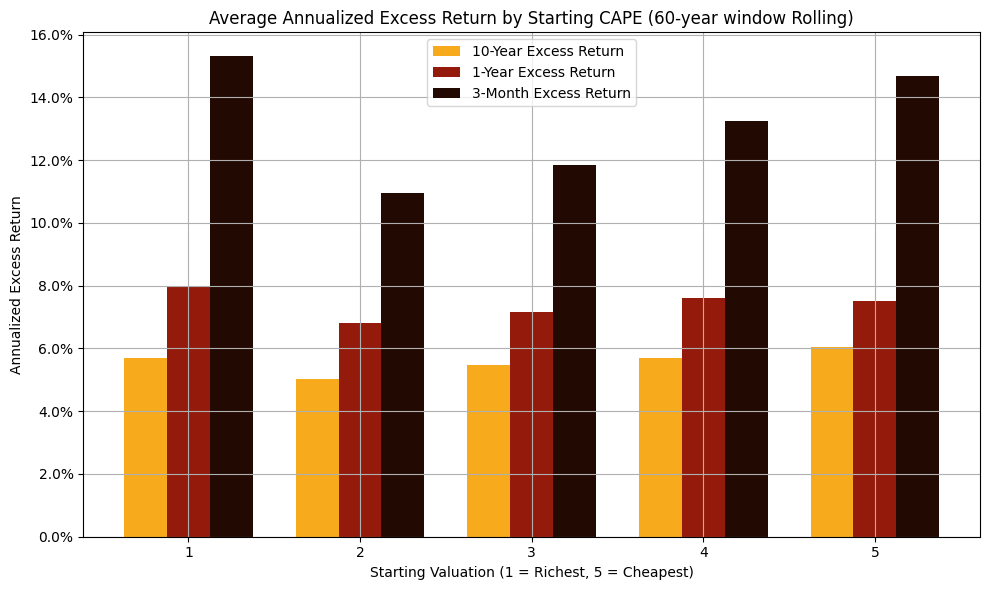

In [325]:
#Chart 2 for paper
import matplotlib.ticker as mtick
import numpy as np
import matplotlib.pyplot as plt

bar_width = 0.25
x = np.arange(len(bin_summary['CAPE_bin']))

plt.figure(figsize=(10, 6))

plt.bar(x - bar_width, bin_summary['10Y Excess Return'], width=bar_width, label='10-Year Excess Return', color='#f6aa1c')
plt.bar(x, bin_summary['1Y Excess Return'], width=bar_width, label='1-Year Excess Return', color='#941b0c')
plt.bar(x + bar_width, bin_summary['3M Excess Return'], width=bar_width, label='3-Month Excess Return', color='#220901')

plt.title('Average Annualized Excess Return by Starting CAPE (60-year window Rolling)')
plt.xlabel('Starting Valuation (1 = Richest, 5 = Cheapest)')
plt.ylabel('Annualized Excess Return')


ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))  # xmax=1.0 means data are fractions (0 to 1)

plt.xticks(x, ['1', '2', '3', '4', '5'])  # Custom x-axis labels
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig("chart_2.jpeg", format='jpeg', dpi=300)  # High-res JPEG
plt.show()

In [307]:
# 3. Strategy: market timing using CAPE
rolling_window = 240  # 20 years of monthly data
df['median_EP'] = df['EP'].rolling(rolling_window).median()
df['range_EP'] = df['EP'].rolling(rolling_window).quantile(0.95) - df['EP'].rolling(rolling_window).quantile(0.05)

# Compute tactical weights
df['signal'] = 100 + 100 * ((df['EP'] - df['median_EP']) / df['range_EP'])
df['weight'] = df['signal'].clip(lower=50, upper=150) / 100  # Clip to 50%-150%

# Strategy return
df['cash_return'] = df['1Y Bond Return'] # Approx. 1M LIBOR ~0.1% annualized
df['strategy_return'] = df['weight'].shift(1) * df['1Y Excess Return'].fillna(0) + (1 - df['weight'].shift(1)) * df['cash_return']

In [308]:
# 4. Buy-and-hold benchmark
df['buy_hold'] = df['1Y Excess Return'].fillna(0)

In [309]:
# 5. Cumulative returns
df['strategy_cum'] = (1 + df['strategy_return']).cumprod()
df['buyhold_cum'] = (1 + df['buy_hold']).cumprod()

In [324]:
df[df['buyhold_cum'] > 100000000000000]

,Date_org,CAPE,Price,Earnings,10Y Excess Return,1Y Excess Return,1M Excess Return,3M Excess Return,1Y Bond Return,Year,...,range_EP,signal,weight,cash_return,strategy_return,buy_hold,strategy_cum,buyhold_cum,value_outperformance,signal_full
Date,,,,,,,,,,,,,,,,,,,,,
1954-08-01,"1,954.08",14.04,365.95,31.28,0.12,0.47,0.40,0.49,-0.02,1954,...,0.05,78.36,0.78,-0.02,0.37,0.47,"412,935,738,873,352.31","116,323,634,761,478.42","296,612,104,111,873.88",106.67
1954-09-01,"1,954.09",14.36,375.92,31.44,0.12,0.49,0.41,0.63,-0.03,1954,...,0.05,75.41,0.75,-0.03,0.38,0.49,"569,668,834,804,443.88","173,569,940,720,262.44","396,098,894,084,181.44",105.09
1954-10-01,"1,954.10",14.62,384.64,31.99,0.12,0.37,0.69,0.61,-0.02,1954,...,0.05,73.03,0.73,-0.02,0.28,0.37,"728,030,346,689,696.38","238,442,487,465,873.62","489,587,859,223,822.75",103.82
1954-11-01,"1,954.11",15.12,399.70,32.55,0.11,0.41,0.83,0.57,-0.01,1954,...,0.05,68.81,0.69,-0.01,0.29,0.41,"941,455,150,454,882.38","335,208,283,916,287.69","606,246,866,538,594.75",101.54
1954-12-01,"1,954.12",15.79,419.56,33.23,0.10,0.36,0.37,0.27,-0.01,1954,...,0.05,63.48,0.63,-0.01,0.24,0.36,"1,169,905,311,985,318.00","455,684,740,649,807.31","714,220,571,335,510.75",98.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,"2,015.01",26.49,"2,779.98",138.84,0.13,-0.04,0.46,0.15,-0.01,2015,...,0.03,95.58,0.96,-0.01,-0.03,-0.04,"1,278,840,164,134,826,505,404,416.00","1,142,899,316,240,122,109,755,392.00","135,940,847,894,704,395,649,024.00",72.82
2015-02-01,"2,015.02",27.00,"2,841.68",136.84,0.12,-0.10,0.05,0.13,0.03,2015,...,0.03,93.12,0.93,0.03,-0.10,-0.10,"1,152,328,722,688,952,886,099,968.00","1,023,057,183,853,987,531,587,584.00","129,271,538,834,965,354,512,384.00",72.11
2015-03-01,"2,015.03",26.73,"2,821.87",134.65,0.12,-0.04,-0.02,0.14,0.03,2015,...,0.03,94.52,0.95,0.03,-0.04,-0.04,"1,109,567,286,553,091,537,633,280.00","980,312,848,995,945,338,109,952.00","129,254,437,557,146,199,523,328.00",72.49


In [310]:
# 6. Value outperformance
df['value_outperformance'] = df['strategy_cum'] - df['buyhold_cum']

In [311]:
print("Strategy Return Mean (annualized %):", df['strategy_return'].mean() * 100)
print("Buy & Hold Return Mean (annualized %):", df['buy_hold'].mean() * 100)
print("Value Outperformance Mean (annualized %):", df['value_outperformance'].mean() * 100)

Strategy Return Mean (annualized %): 7.308294164923322
Buy & Hold Return Mean (annualized %): 6.217835482356316
Value Outperformance Mean (annualized %): -2.7879593867470365e+26


In [312]:
df

,Date_org,CAPE,Price,Earnings,10Y Excess Return,1Y Excess Return,1M Excess Return,3M Excess Return,1Y Bond Return,Year,...,median_EP,range_EP,signal,weight,cash_return,strategy_return,buy_hold,strategy_cum,buyhold_cum,value_outperformance
Date,,,,,,,,,,,,,,,,,,,,,
1900-01-01,"1,900.01",18.67,247.44,19.47,0.07,0.18,0.22,0.17,0.06,1900,...,NaN,NaN,NaN,NaN,0.06,NaN,0.18,NaN,1.18,NaN
1900-02-01,"1,900.02",18.70,248.90,19.24,0.06,0.19,0.11,-0.12,0.09,1900,...,NaN,NaN,NaN,NaN,0.09,NaN,0.19,NaN,1.40,NaN
1900-03-01,"1,900.03",18.78,250.91,19.24,0.06,0.23,0.17,-0.27,0.09,1900,...,NaN,NaN,NaN,NaN,0.09,NaN,0.23,NaN,1.73,NaN
1900-04-01,"1,900.04",18.94,254.11,19.24,0.06,0.33,-0.61,-0.30,0.10,1900,...,NaN,NaN,NaN,NaN,0.10,NaN,0.33,NaN,2.29,NaN
1900-05-01,"1,900.05",18.40,247.99,19.71,0.06,0.32,-0.36,-0.06,0.07,1900,...,NaN,NaN,NaN,NaN,0.07,NaN,0.32,NaN,3.02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,"2,015.01",26.49,"2,779.98",138.84,0.13,-0.04,0.46,0.15,-0.01,2015,...,0.04,0.03,95.58,0.96,-0.01,-0.03,-0.04,"1,278,840,164,134,826,505,404,416.00","1,142,899,316,240,122,109,755,392.00","135,940,847,894,704,395,649,024.00"
2015-02-01,"2,015.02",27.00,"2,841.68",136.84,0.12,-0.10,0.05,0.13,0.03,2015,...,0.04,0.03,93.12,0.93,0.03,-0.10,-0.10,"1,152,328,722,688,952,886,099,968.00","1,023,057,183,853,987,531,587,584.00","129,271,538,834,965,354,512,384.00"
2015-03-01,"2,015.03",26.73,"2,821.87",134.65,0.12,-0.04,-0.02,0.14,0.03,2015,...,0.04,0.03,94.52,0.95,0.03,-0.04,-0.04,"1,109,567,286,553,091,537,633,280.00","980,312,848,995,945,338,109,952.00","129,254,437,557,146,199,523,328.00"


In [313]:
# Compute global (static) median and range for the full period (for latter Signal subplot)
global_median = df['EP'].median()
global_range = df['EP'].quantile(0.95) - df['EP'].quantile(0.05)

# Calculate signal based on the full sample
df['signal_full'] = 100 + 100 * ((df['EP'] - global_median) / global_range)

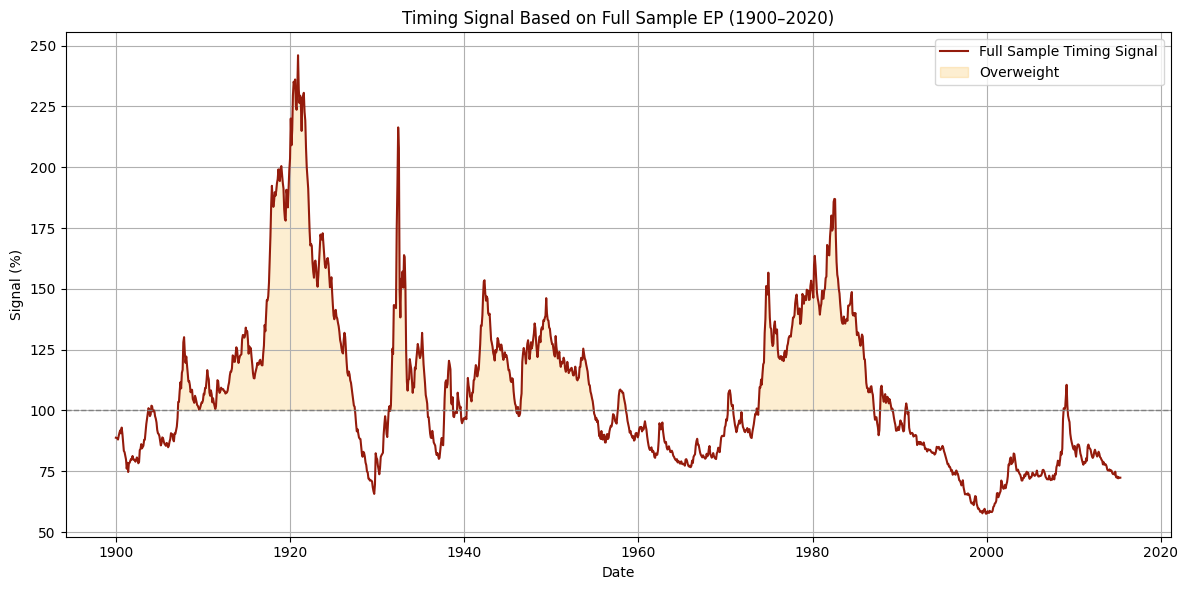

In [314]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['signal_full'], label='Full Sample Timing Signal', color='#941b0c')
plt.axhline(100, color='gray', linestyle='--', linewidth=1)
plt.fill_between(df.index, 100, df['signal_full'], where=(df['signal_full'] > 100),
                 color='#f6aa1c', alpha=0.2, label='Overweight')
plt.title('Timing Signal Based on Full Sample EP (1900–2020)')
plt.ylabel('Signal (%)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

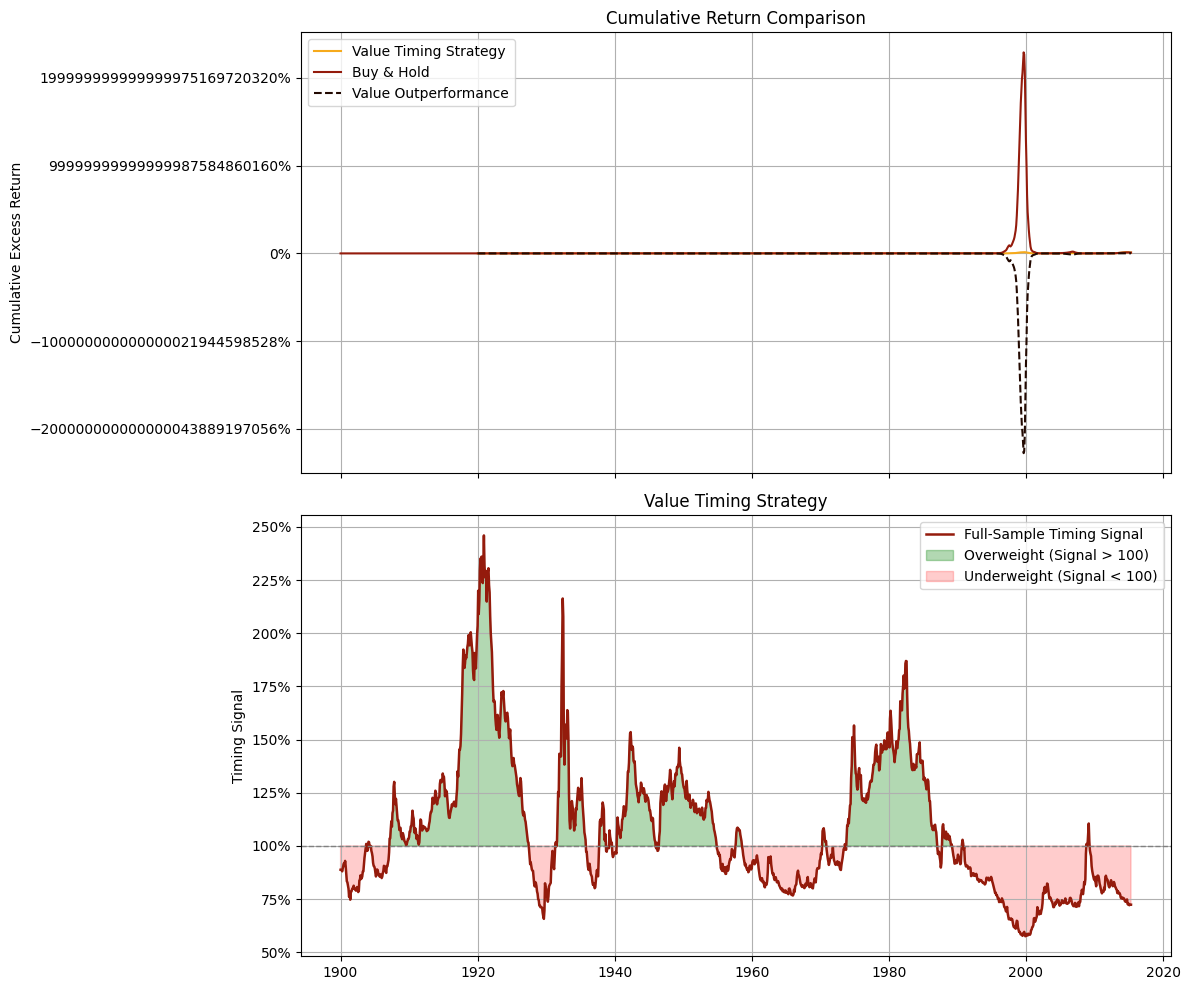

In [315]:
#Chart 3 final plot
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# --- Compute full-sample signal ---
global_median = df['EP'].median()
global_range = df['EP'].quantile(0.95) - df['EP'].quantile(0.05)
df['signal_full'] = 100 + 100 * ((df['EP'] - global_median) / global_range)

# --- Create subplots ---
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# --- Plot 1: Cumulative Returns ---
ax1.plot(df['strategy_cum'], label='Value Timing Strategy', color='#f6aa1c')
ax1.plot(df['buyhold_cum'], label='Buy & Hold', color='#941b0c')
ax1.plot(df['value_outperformance'], label='Value Outperformance', linestyle='--', color='#220901')
ax1.set_title('Cumulative Return Comparison')
ax1.set_ylabel('Cumulative Excess Return')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

ax1.grid(True)
ax1.legend(loc='upper left')

# --- Plot 2: Full-Sample Timing Signal ---
ax2.plot(df['signal_full'], label='Full-Sample Timing Signal', color='#941b0c', linewidth=1.8)
ax2.axhline(100, color='gray', linestyle='--', linewidth=1)
# Highlight periods where signal > 100
ax2.fill_between(df.index, df['signal_full'], 100, where=df['signal_full'] > 100, 
                 color='green', alpha=0.3, label='Overweight (Signal > 100)')

# Optionally highlight underweight too
ax2.fill_between(df.index, df['signal_full'], 100, where=df['signal_full'] < 100, 
                 color='red', alpha=0.2, label='Underweight (Signal < 100)')
ax2.set_title('Value Timing Strategy')
ax2.set_ylabel('Timing Signal')
ax2.set_xlabel('')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.grid(True)
ax2.legend(loc='upper right')

# --- Final formatting ---
plt.xticks(rotation=0)
plt.savefig("chart_3.jpeg", format='jpeg', dpi=300) 
plt.tight_layout()

plt.show()

In [316]:
#Table 2 preparation
import numpy as np
import pandas as pd

# Annualization helpers
def annualize_return(mean_return, periods_per_year=12):
    return (1 + mean_return)**periods_per_year - 1

def annualize_volatility(std_return, periods_per_year=12):
    return std_return * np.sqrt(periods_per_year)

def sharpe_ratio(mean_return, std_return):
    return mean_return / std_return if std_return != 0 else np.nan

def max_drawdown(cum_returns):
    peak = cum_returns.cummax()
    drawdown = (cum_returns - peak) / peak
    return drawdown.min()

def max_relative_drawdown(diff_cum_returns):
    peak = diff_cum_returns.cummax()
    drawdown = (diff_cum_returns - peak) / peak
    return drawdown.min()

def compute_metrics(df_period, periods_per_year=12):
    # Means and std dev of periodic returns
    mean_strat = df_period['strategy_return'].mean()
    std_strat = df_period['strategy_return'].std()
    mean_bh = df_period['buy_hold'].mean()
    std_bh = df_period['buy_hold'].std()
    
    # Annualized returns and volatility
    ann_return_strat = annualize_return(mean_strat, periods_per_year)
    ann_vol_strat = annualize_volatility(std_strat, periods_per_year)
    ann_return_bh = annualize_return(mean_bh, periods_per_year)
    ann_vol_bh = annualize_volatility(std_bh, periods_per_year)
    
    # Sharpe ratios (using periodic mean/std)
    sharpe_strat = sharpe_ratio(mean_strat, std_strat)
    sharpe_bh = sharpe_ratio(mean_bh, std_bh)
    
    # Max drawdowns (in decimal)
    max_dd_strat = max_drawdown(df_period['strategy_cum'])
    max_dd_bh = max_drawdown(df_period['buyhold_cum'])
    
    # Max relative drawdown: drawdown of (strategy - buy_hold) cumulative
    diff_cum = df_period['strategy_cum'] / df_period['buyhold_cum'] - 1
    max_rel_dd = max_drawdown(diff_cum + 1)  # Add 1 to make it a cumulative wealth series
    
    # Average position (%)
    avg_position = df_period['weight'].mean() * 100
    
    # Impact of average tilt: difference from 100% position * benchmark return
    avg_tilt = (avg_position/100) * ann_return_bh
    
    # Formatting results as percentages
    results = {
        'Excess return (%)': [ann_return_bh * 100, ann_return_strat * 100],
        'Volatility (%)': [ann_vol_bh * 100, ann_vol_strat * 100],
        'Sharpe ratio': [sharpe_bh, sharpe_strat],
        'Max drawdown (%)': [max_dd_bh * 100, max_dd_strat * 100],
        'Max relative drawdown (%)': [np.nan, max_rel_dd * 100],
        'Average position (%)': [100, avg_position],
        'Impact of avg tilt (%)': [np.nan, -avg_tilt * 100],  # Opposite signs as per example
    }
    return results

# Subset periods (make sure your DataFrame's index is datetime)
df_1900 = df.loc['1900':'2015']
df_1958 = df.loc['1958':'2015']

metrics_1900 = compute_metrics(df_1900)
metrics_1958 = compute_metrics(df_1958)

# Combine into DataFrame for display
table = pd.DataFrame({
    'Buy-and-hold (1900–2015)': [metrics_1900[key][0] for key in metrics_1900],
    'Value timing (1900–2015)': [metrics_1900[key][1] for key in metrics_1900],
    'Buy-and-hold (1958–2015)': [metrics_1958[key][0] for key in metrics_1958],
    'Value timing (1958–2015)': [metrics_1958[key][1] for key in metrics_1958],
}, index=metrics_1900.keys())

# Formatting the table for better readability
pd.options.display.float_format = '{:,.2f}'.format
print(table.fillna(''))

                          Buy-and-hold (1900–2015)  Value timing (1900–2015)  \
Excess return (%)                           106.24                    133.13   
Volatility (%)                               71.53                     78.53   
Sharpe ratio                                  0.30                      0.32   
Max drawdown (%)                           -100.00                   -100.00   
Max relative drawdown (%)                                             -99.86   
Average position (%)                        100.00                     95.68   
Impact of avg tilt (%)                                               -101.65   

                          Buy-and-hold (1958–2015)  Value timing (1958–2015)  
Excess return (%)                            66.00                     70.69  
Volatility (%)                               58.36                     63.49  
Sharpe ratio                                  0.26                      0.25  
Max drawdown (%)                           

In [317]:
table

,Buy-and-hold (1900–2015),Value timing (1900–2015),Buy-and-hold (1958–2015),Value timing (1958–2015)
Excess return (%),106.24,133.13,66.00,70.69
Volatility (%),71.53,78.53,58.36,63.49
Sharpe ratio,0.30,0.32,0.26,0.25
Max drawdown (%),-100.00,-100.00,-100.00,-100.00
Max relative drawdown (%),NaN,-99.86,NaN,-99.84
Average position (%),100.00,95.68,100.00,93.01
Impact of avg tilt (%),NaN,-101.65,NaN,-61.39


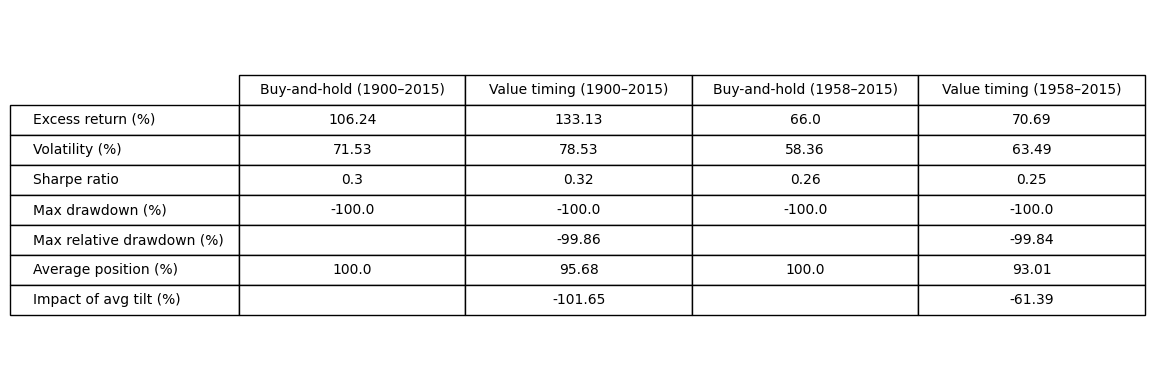

In [318]:
import matplotlib.pyplot as plt

# Round numeric columns only
table_display = table.copy()
numeric_cols = table_display.select_dtypes(include=['number']).columns
table_display[numeric_cols] = table_display[numeric_cols].round(2)
table_display = table_display.fillna('')

fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('off')

mpl_table = ax.table(cellText=table_display.values,
                     rowLabels=table_display.index,
                     colLabels=table_display.columns,
                     cellLoc='center',
                     loc='center')

mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(10)
mpl_table.scale(1.2, 1.5)

plt.tight_layout()
plt.savefig('table_2.jpeg', format='jpeg', dpi=300)
plt.show()

In [319]:
# Final comparison
final_vals = df[['strategy_cum', 'buyhold_cum']].dropna().iloc[-1]
print("\nFinal Cumulative Return:")
print(f"Strategy: {final_vals['strategy_cum']:.2f}x")
print(f"Buy & Hold: {final_vals['buyhold_cum']:.2f}x")


Final Cumulative Return:
Strategy: 1032901862059816205156352.00x
Buy & Hold: 904670710927478671540224.00x
